In [28]:
import pandas as pd
import gc
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [17]:
zara = pd.read_csv('C:\\Users\\Usuario\\Downloads\\zara.csv', delimiter =';')

In [24]:
print(zara.head())

   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle        No         Clothing       No   
1      188771            Aisle        No         Clothing       No   
2      180176          End-cap       Yes         Clothing      Yes   
3      112917            Aisle       Yes         Clothing      Yes   
4      192936          End-cap        No         Clothing      Yes   

   Sales Volume brand                  name  \
0          2823  Zara   BASIC PUFFER JACKET   
1           654  Zara         TUXEDO JACKET   
2          2220  Zara  SLIM FIT SUIT JACKET   
3          1568  Zara   STRETCH SUIT JACKET   
4          2942  Zara   DOUBLE FACED JACKET   

                                         description   price currency  \
0  Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1  Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2  Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3  S

In [19]:
zara = zara.drop(["url"], axis=1)

In [20]:
zara = zara.drop(["sku"], axis=1)

In [22]:
# First, ensure pandas knows that 'scraped_at' is a datetime column
zara['scraped_at'] = pd.to_datetime(zara['scraped_at'])

# Find the minimum and maximum
min_date = zara['scraped_at'].min()
max_date = zara['scraped_at'].max()

print("Scraped at range:")
print("From:", min_date)
print("To:", max_date)


Scraped at range:
From: 2024-02-19 08:50:05.654618
To: 2024-02-19 09:10:52.485772


In [23]:
zara = zara.drop(["scraped_at"], axis = 1)

In [27]:
print(zara.shape)

(252, 13)


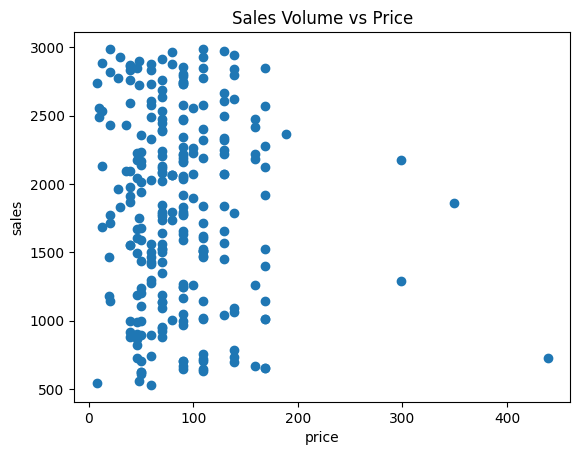

In [33]:
plt.scatter(zara["price"], zara["Sales Volume"])
plt.xlabel("price")
plt.ylabel("sales")
plt.title("Sales Volume vs Price")
plt.show()


In [72]:
print((zara['Seasonal'] == "Yes").value_counts())
print(zara['Product Position'].value_counts())
print((zara['Promotion'] == "Yes").value_counts())
print(zara['Product Category'].value_counts())
print(zara['terms'].value_counts())
print(zara['section'].value_counts())

Seasonal
True     128
False    124
Name: count, dtype: int64
Product Position
Aisle             97
End-cap           86
Front of Store    69
Name: count, dtype: int64
Promotion
False    132
True     120
Name: count, dtype: int64
Product Category
Clothing    252
Name: count, dtype: int64
terms
jackets     140
sweaters     41
t-shirts     32
shoes        31
jeans         8
Name: count, dtype: int64
section
MAN      218
WOMAN     34
Name: count, dtype: int64


In [39]:
# Group by 'Seasonal' and sum 'Sales Volume'
sales_by_seasonal = zara.groupby('Seasonal')['Sales Volume'].sum()
print(sales_by_seasonal)


Seasonal
No     226392
Yes    233181
Name: Sales Volume, dtype: int64


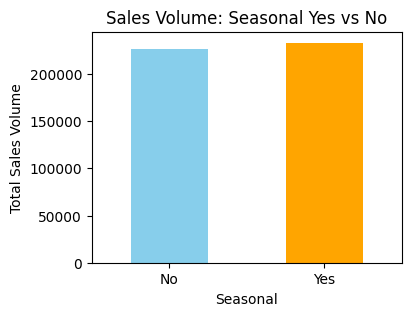

In [66]:
# Plot
plt.figure(figsize=(4, 3))
sales_by_seasonal.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume: Seasonal Yes vs No')
plt.xticks(rotation=0)
plt.show()

In [ ]:
print(len(zara['Product Category'].unique()))

1


In [52]:
print(zara.columns)

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'name', 'description', 'price',
       'currency', 'terms', 'section'],
      dtype='object')


In [57]:
sections = sorted(zara['section'].unique())
positions = sorted(zara['Product Position'].unique())
terms = sorted(zara['terms'].unique())
currency = sorted(zara['currency'].unique())
category = sorted(zara['Product Category'].unique())
brands = sorted(zara['brand'].unique())
print("sections:", sections)
print("positions:", positions)
print("terms:", terms)
print("currency:", currency)
print("categories:", category)
print("brands:", brands)

sections: ['MAN', 'WOMAN']
positions: ['Aisle', 'End-cap', 'Front of Store']
terms: ['jackets', 'jeans', 'shoes', 'sweaters', 't-shirts']
currency: ['USD']
categories: ['Clothing']
brands: ['Zara']


Product Position
Aisle             97
End-cap           86
Front of Store    69
Name: count, dtype: int64


Product Position
Aisle             177396
End-cap           152930
Front of Store    129247
Name: Sales Volume, dtype: int64


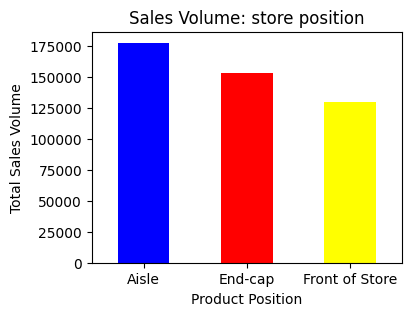

In [61]:
sales_by_position = zara.groupby('Product Position')['Sales Volume'].sum()
print(sales_by_position)
# Plot
plt.figure(figsize=(4, 3))
sales_by_position.plot(kind='bar', color=['blue', 'red', 'yellow'])
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume: store position')
plt.xticks(rotation=0)
plt.show()

terms
jackets     259468
jeans        13320
shoes        57906
sweaters     75242
t-shirts     53637
Name: Sales Volume, dtype: int64


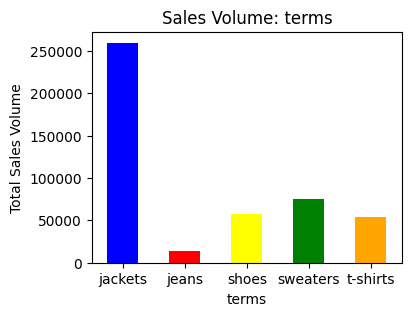

In [62]:
sales_by_terms = zara.groupby('terms')['Sales Volume'].sum()
print(sales_by_terms)
# Plot
plt.figure(figsize=(4, 3))
sales_by_terms.plot(kind='bar', color=['blue', 'red', 'yellow', 'green', 'orange'])
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume: terms')
plt.xticks(rotation=0)
plt.show()

section
MAN      396199
WOMAN     63374
Name: Sales Volume, dtype: int64


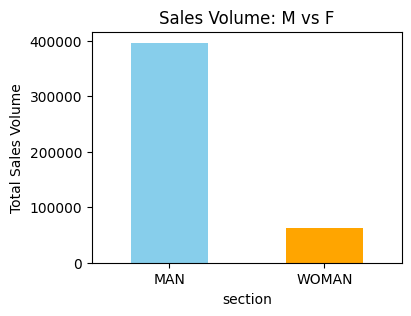

In [65]:
sales_by_gender = zara.groupby('section')['Sales Volume'].sum()
print(sales_by_gender)
# Plot
plt.figure(figsize=(4, 3))
sales_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume: M vs F')
plt.xticks(rotation=0)
plt.show()

Promotion
No     240312
Yes    219261
Name: Sales Volume, dtype: int64


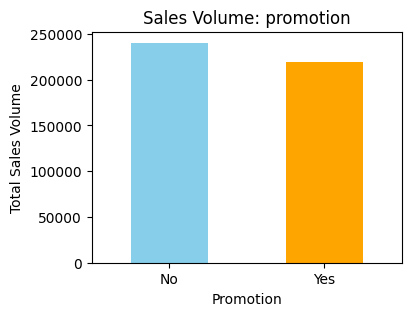

In [69]:
sales_by_promotion = zara.groupby('Promotion')['Sales Volume'].sum()
print(sales_by_promotion)
# Plot
plt.figure(figsize=(4, 3))
sales_by_promotion.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume: promotion')
plt.xticks(rotation=0)
plt.show()